Zajecia 1 zadanie 3

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('train/train.tsv', header=None, sep='\t')
df.columns = ['price', 'isNew', 'rooms', 'floor', 'location', 'sqrMetres']
df = pd.DataFrame(df, columns = ['price', 'isNew', 'rooms', 'floor', 'sqrMetres'])
df.head()

,price,isNew,rooms,floor,sqrMetres
0,476118,False,3,1,78
1,459531,False,3,2,62
2,411557,False,3,0,15
3,496416,False,4,0,14
4,406032,False,3,0,15


In [3]:
print df.corr()

              price     isNew     rooms     floor  sqrMetres
price      1.000000  0.034873  0.508833 -0.068882   0.422073
isNew      0.034873  1.000000  0.008730 -0.062179   0.083835
rooms      0.508833  0.008730  1.000000 -0.078585   0.377587
floor     -0.068882 -0.062179 -0.078585  1.000000  -0.055053
sqrMetres  0.422073  0.083835  0.377587 -0.055053   1.000000


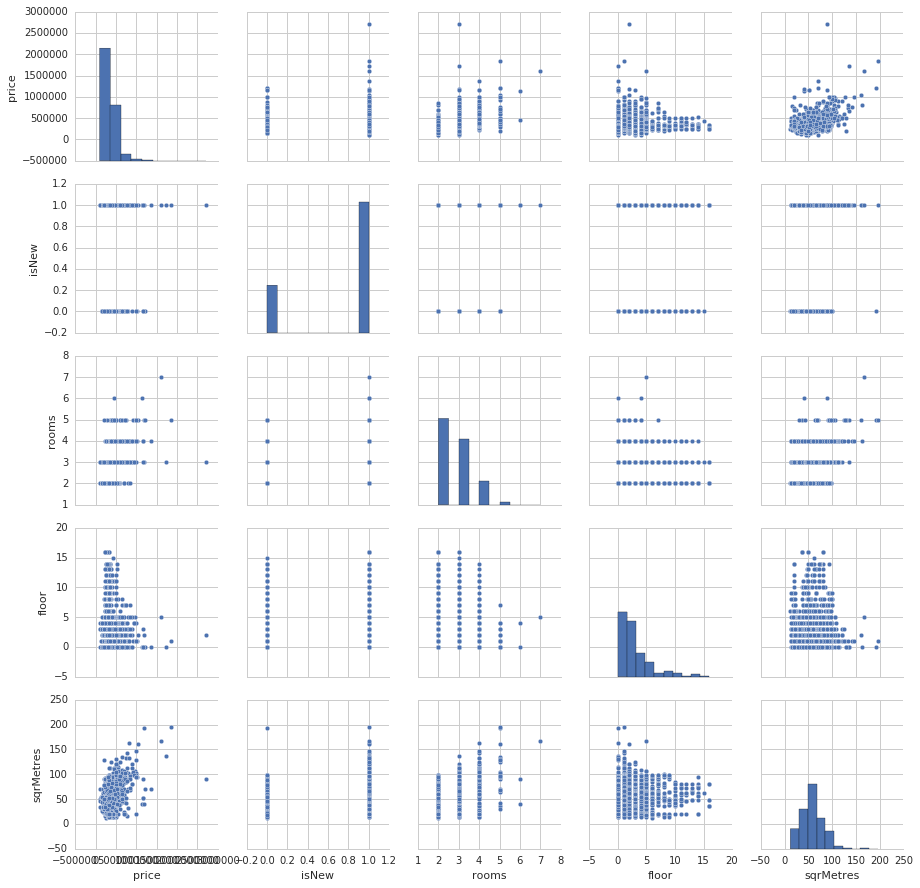

In [4]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['price', 'isNew', 'rooms', 'floor', 'sqrMetres']
sns.pairplot(df[cols], size=2.5)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
X = pd.DataFrame(df, columns = ['isNew', 'rooms', 'floor', 'sqrMetres'])
lm = LinearRegression()
lm.fit(X, df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print 'Punkt przecięcia:', lm.intercept_
print 'Liczba współczynników:', len(lm.coef_)

Punkt przecięcia: 28450.2929728
Liczba współczynników: 4


In [7]:
lm.predict(X)

array([ 432861.08645604,  401333.30175489,  314700.89589835, ...,
        407412.18797125,  414835.45521513,  380201.65326704])

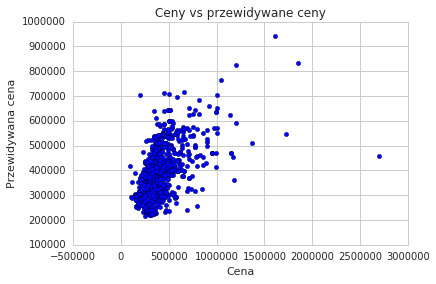

In [8]:
plt.scatter(df.price, lm.predict(X))
plt.xlabel('Cena')
plt.ylabel('Przewidywana cena')
plt.title('Ceny vs przewidywane ceny')

In [9]:
mseFull = np.mean((df.price -lm.predict(X)) ** 2)
print mseFull

18243710690.7


In [10]:
rd = pd.read_csv('dev-0/in.tsv', sep='\t', names=['isNew', 'rooms', 'floor', 'location', 'sqrMetres'])

In [19]:
print lm.predict(pd.DataFrame(rd, columns=['isNew', 'rooms', 'floor', 'sqrMetres']))

[  345700.99959646   281678.76837824   553994.14598316   264253.89764659
   294258.70810991   459099.05039187   518509.10363926   332154.39804886
   352313.47576833   350863.58103673   219834.43172593   514330.91087231
   287496.27014659   459388.0694133    476679.79186743   424465.24844378
   273943.75964653   305099.73408856   397938.26548652   373311.97597867
   342600.89130199   331232.1843203    300232.08062219   273260.20789957
   527305.38332951   517831.46084477   375728.53252619   416046.68796512
   402939.0672304    284101.23387822   468861.99189804   316840.25132936
   458409.58969245   400888.41198954   275755.75290579   300232.08062219
   493199.26238446   278045.07012826   281967.78739967   426204.16219681
   510408.1936009    264469.83716179   409151.10172428   314484.95638314
   306155.09609464   305471.54434768   397938.26548652   352991.11856282
   285996.01837517   417175.12947742   397938.26548652   273416.07864349
   407412.18797125   382624.11876702   546936.78004

In [20]:
ui = pd.read_csv('test-A/in.tsv', sep='\t', names=['isNew', 'rooms', 'floor', 'location', 'sqrMetres'])
ui.head()

,isNew,rooms,floor,location,sqrMetres
0,True,2,3,Rataje,38
1,True,3,7,Wilda,20
2,True,4,4,Piątkowo,73
3,False,3,2,Stare,78
4,True,3,1,Nowe,56


In [21]:
lm.predict(pd.DataFrame(ui, columns=['isNew', 'rooms', 'floor', 'sqrMetres']))

array([ 271521.29414655,  318513.18735865,  508513.40910395,
        431649.85370605,  393992.8257487 ,  334865.88257028,
        487514.90889361,  314484.95638314,  363971.20177144,
        313206.55307939,  343517.19607808,  340706.10680504,
        280251.59611304,  308428.79263318,  295469.94085991,
        407412.18797125,  438250.51197298,  297892.40635989,
        395887.61024565,  405272.83254023,  285096.52711301,
        290313.2683721 ,  335015.84436173,  303732.63059465,
        289257.90636603,  408228.88799572,  447046.79166323,
        439467.65367544,  364804.71530985,  285096.52711301,
        290313.2683721 ,  336916.53781114,  545569.67655203,
        310784.0875794 ,  492143.90037838,  281990.50986607,
        676993.35858835,  264625.70790571,  409745.95328108,
        350024.15854586,  275154.99239652,  595511.71626715,
        635308.09965551,  338595.38279289,  284628.91488126,
        236203.9404515 ,  433939.17092852,  625834.17717077,
        379518.10152008,